# Bagging

Tree-based methods usually suffers from high variance: if we train the same model on different dataset, the estimated tree could be completely different. This is not desirable in practice since we want low variance model. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

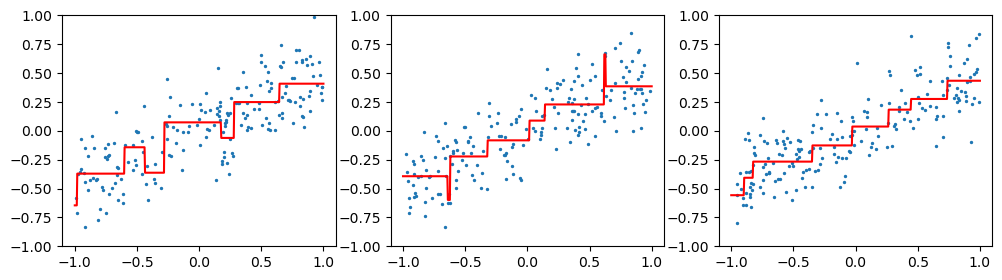

In [26]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
xx = np.linspace(-1, 1, 500)
for i in range(3):
    x = np.random.uniform(-1, 1, 200)
    y = 0.5 * x + 0.2 * np.random.randn(200)
    reg_tree = DecisionTreeRegressor(max_depth=3)
    reg_tree.fit(x.reshape(x.shape[0], 1), y)
    y_pred = reg_tree.predict(xx.reshape(xx.shape[0], 1))
    ax[i].scatter(x, y, s=2)
    ax[i].plot(xx, y_pred, c="r")
    ax[i].set_ylim(-1, 1)
plt.show()

Bagging is a method of variance reduction. It works by averaging the prediction of $n$ models trained on different training set. For example, if we take the average of $5$ predictors each time, then we have a much more stable predictor.

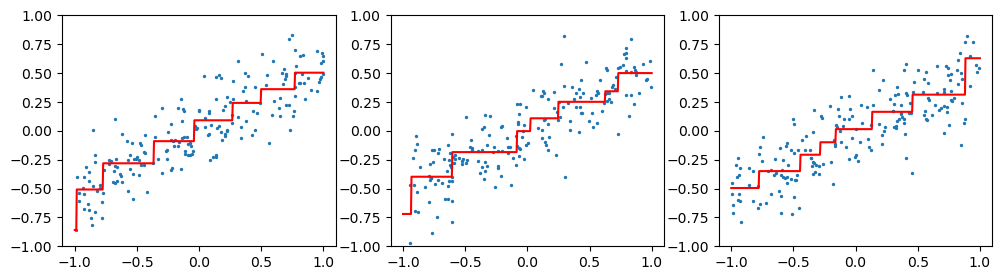

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(3):
    x = np.random.uniform(-1, 1, 200)
    y = 0.5 * x + 0.2 * np.random.randn(200)
    y_pred = np.zeros(xx.shape[0])
    for n in range(100):
        reg_tree = DecisionTreeRegressor(max_depth=3)
        reg_tree.fit(x.reshape(x.shape[0], 1), y)
        y_pred += reg_tree.predict(xx.reshape(xx.shape[0], 1))
    y_pred /= 100
    ax[i].scatter(x, y, s=2)
    ax[i].plot(xx, y_pred, c="r")
    ax[i].set_ylim(-1, 1)
plt.show()

By averaging $n$ predictors, the bias of the model remains the same by linearity. The variance of the model, however, becomes $\sigma^2/n$. This means that if we train a $n$ models on $n$ different training sets and then average the results, we get a predictor with the same bias, but lower variance. In practice, however, we don't have access to that much training sets. One way of resolving this is through boostrapping: we resample $n$ datapoints with replacement from the training set and then train the model on the resampled training set. 

In [54]:
def regressionTree(x, y):
    reg_tree = DecisionTreeRegressor(max_depth=3)
    reg_tree.fit(x.reshape(x.shape[0], 1), y)
    y_pred = reg_tree.predict(xx.reshape(xx.shape[0], 1))
    error = y_pred - 0.5 * xx
    bias = error.mean()
    variance = np.var(y_pred)
    return bias, variance

In [55]:
def regressionTreeBagged(x, y, num_trees=10):
    y_pred = np.zeros(xx.shape[0])
    for i in range(num_trees):
        reg_tree = DecisionTreeRegressor(max_depth=3)
        x_sample = np.random.choice(x, size=1000, replace=True)
        reg_tree.fit(x_sample.reshape(x_sample.shape[0], 1), y)
        y_pred += reg_tree.predict(xx.reshape(xx.shape[0], 1))
    y_pred /= num_trees
    error = y_pred - 0.5 * xx
    bias = error.mean()
    variance = np.var(y_pred)
    return bias, variance

In [56]:
bias, variance = [], []
bagged_bias, bagged_variance = [], []
for i in range(1000):
    x = np.random.uniform(-1, 1, 1000)
    y = 0.5 * x + 0.2 * np.random.randn(1000)
    b, v = regressionTree(x, y)
    bagged_b, bagged_v = regressionTreeBagged(x, y)
    bias.append(b)
    variance.append(v)
    bagged_bias.append(bagged_b)
    bagged_variance.append(bagged_v)
bias = np.array(bias)
variance = np.array(variance)
bagged_bias = np.array(bagged_bias)
bagged_variance = np.array(bagged_variance)

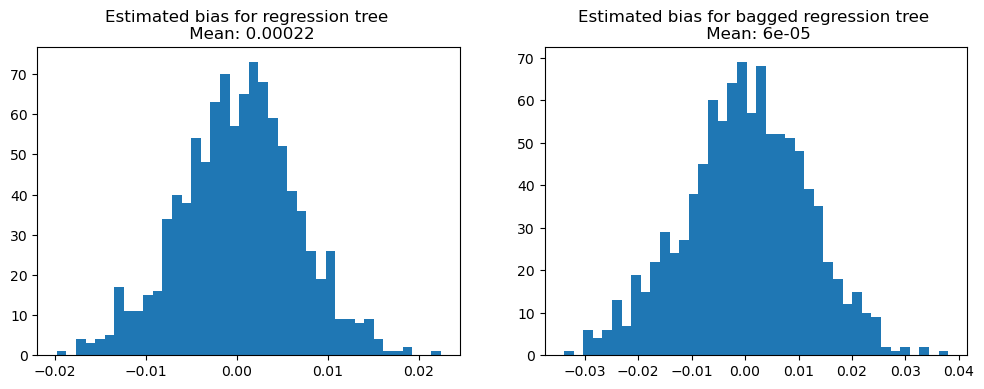

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(bias, bins=40)
ax[0].set_title(f"Estimated bias for regression tree \n Mean: {round(np.mean(bias), 5)}")
ax[1].hist(bagged_bias, bins=40)
ax[1].set_title(f"Estimated bias for bagged regression tree \n Mean: {round(np.mean(bagged_bias), 5)}")
plt.show()

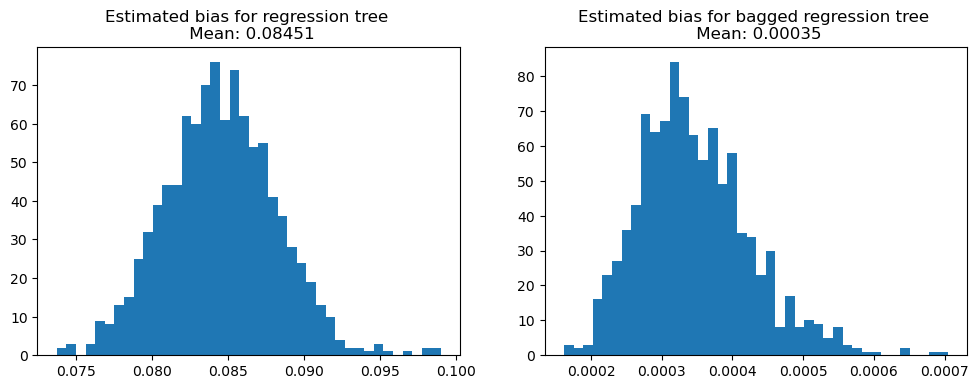

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(variance, bins=40)
ax[0].set_title(f"Estimated bias for regression tree \n Mean: {round(np.mean(variance), 5)}")
ax[1].hist(bagged_variance, bins=40)
ax[1].set_title(f"Estimated bias for bagged regression tree \n Mean: {round(np.mean(bagged_variance), 5)}")
plt.show()